<a href="https://colab.research.google.com/github/saicharan7479/pytorch-notes/blob/main/pytorch_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn #this nn contains all types of buliding blocks of neural networks
import matplotlib.pyplot as plt

In [ ]:
#linear regression shows the relationship between a dependent variable and one or more independent variables.
#y=mx+b𝑦
#y: dependent variable (target/output)
#x: independent variable (input)
#m: slope of the line
#b: y-intercept (where the line crosses the y-axis)
# we will make staright line using linear regeression using formula

In [ ]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

In [ ]:
#splitting is the most important part in machine learning
#in this 80 % of data is for training and 20% is for testing so we use 0.8 or 80 percent alot for training
train_split=(int(0.8*len(X)))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:

    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

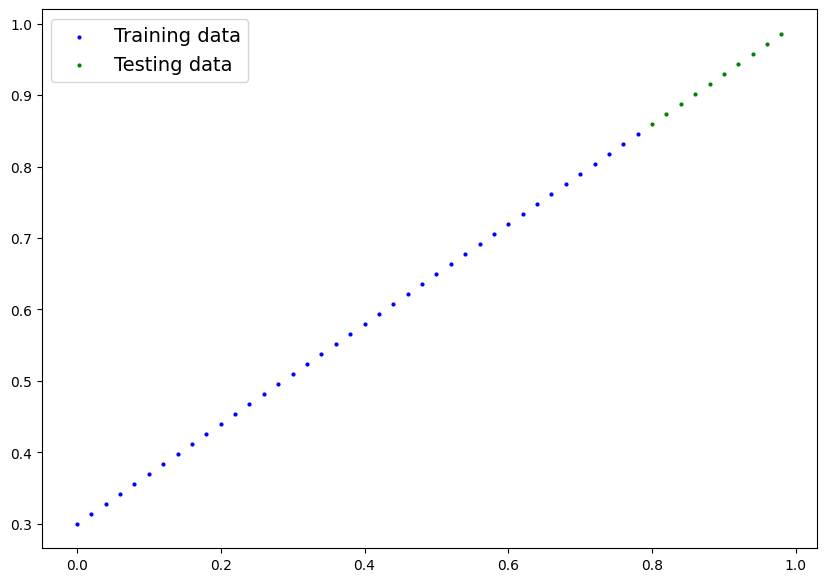

In [ ]:
plot_predictions()

Gradient Descent = "I need to update my weights to reduce error"
Backpropagation = "Let me figure out HOW MUCH each weight contributed to that error"


In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),
                                   requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),
requires_grad=True)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [ ]:
model_0 = LinearRegressionModel()
list(model_0.parameters())


[Parameter containing:
 tensor([-0.6761], requires_grad=True),
 Parameter containing:
 tensor([0.5373], requires_grad=True)]

In [ ]:
import random
random.seed(42) #if we used random seed then we will get the same answer
print(random.randint(1, 100))

82


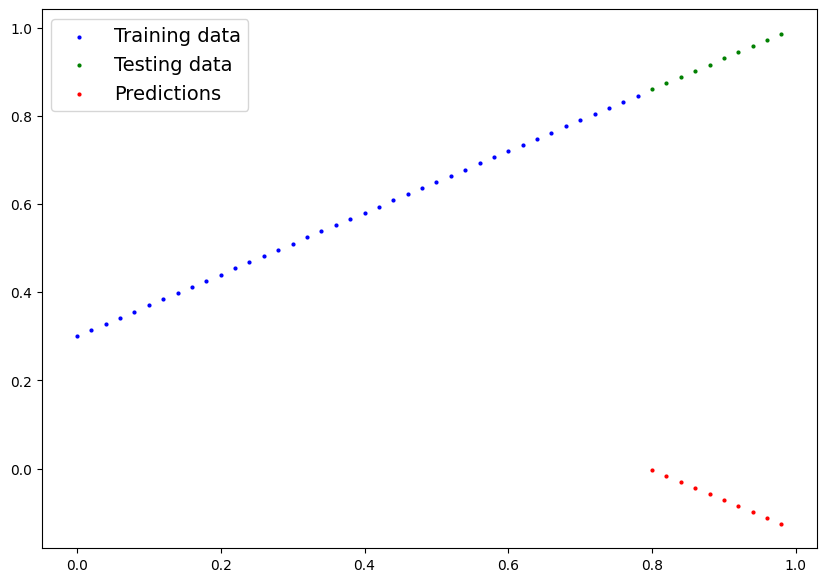

In [ ]:
with torch.inference_mode():
  y_preeee=model_0(X_test)
y_preeee
plot_predictions(predictions=y_preeee)

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), # we want to optimize the parameters present in our model
                           lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

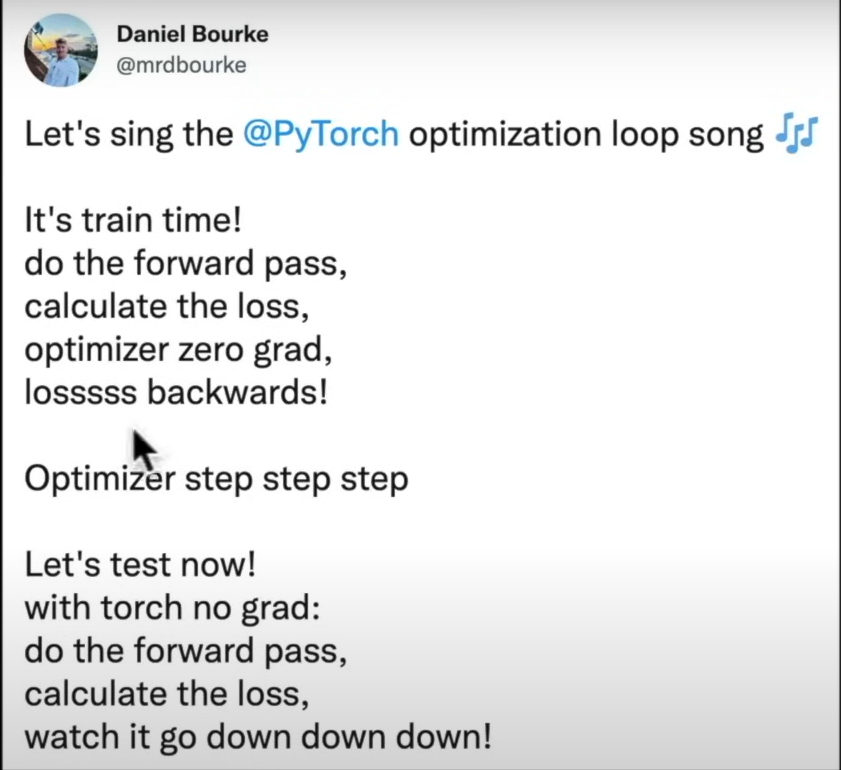

In [ ]:
epochs = 1 #  this is like how much time we need to train.

## loop through the data
#this is the strp for testing and then evaluatating i mean therer is a song upside
for epoch in range(epochs):
  #set the model training loop
  model_0.train()
  #calculate the forward pass
  y_preeee = model_0(X_train) #this forward pass will make predictions
  #calculate the loss
  loss = loss_fn(y_preeee, y_train) #caluclate loss and make measures mistakes
  #optimizer
  optimizer.zero_grad()     # tflobs
  #perform back propagation
  loss.backward()
  #then we need t ostep the optimizer
  optimizer.step()

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.22168047726154327 | MAE Test Loss: 0.5514353513717651 
Epoch: 10 | MAE Train Loss: 0.21768048405647278 | MAE Test Loss: 0.5336353182792664 
Epoch: 20 | MAE Train Loss: 0.21405255794525146 | MAE Test Loss: 0.5212594866752625 
Epoch: 30 | MAE Train Loss: 0.2105625569820404 | MAE Test Loss: 0.5102397203445435 
Epoch: 40 | MAE Train Loss: 0.20707252621650696 | MAE Test Loss: 0.4992198944091797 
Epoch: 50 | MAE Train Loss: 0.2035825252532959 | MAE Test Loss: 0.48820018768310547 
Epoch: 60 | MAE Train Loss: 0.20009250938892365 | MAE Test Loss: 0.4771803319454193 
Epoch: 70 | MAE Train Loss: 0.1966024935245514 | MAE Test Loss: 0.4661605954170227 
Epoch: 80 | MAE Train Loss: 0.19311249256134033 | MAE Test Loss: 0.4551408290863037 
Epoch: 90 | MAE Train Loss: 0.18962247669696808 | MAE Test Loss: 0.44412103295326233 



PyTorch method	What does it do?
torch.save	Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save
torch.load	Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).

In [ ]:
#In this wee need to merge the aall i mean weight bias converting into tensors and splitting data train the model and test the data and calucalte the predictins
#that's the the end of train build and all things.
#we are stepping into neural networkss yayayayayyayay